In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
#Read data files
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')
# sample_submission = pd.read_csv('../data/sample_submission_kaggle.csv')
# extra_infos = pd.read_json('../data/extra_infos.json',lines=True)

# Add this function to preprocessing

In [4]:
def avg_listened_context(train):
    df = train.groupby(['context_type','listen_type'])['is_listened'].mean().to_frame()
    counts_context = train.groupby(['context_type','listen_type'])['listen_type'].count().values
    df['counts'] = counts_context
#     print(df.head())
    
    df_good = df[df['counts'] > 20] #enough values (>20) for the couple {context_type,listen_type}
    values_mean_0 = np.mean(df_good.iloc[df_good.index.get_level_values('listen_type') == 0]['is_listened'])
    values_mean_1 = np.mean(df_good.iloc[df_good.index.get_level_values('listen_type') == 1]['is_listened'])
    #It gives values_mean_0 = 0.8023956516407501 and values_mean_1 = 0.6677213531261914
    
    #------------------------------------------------------------
    def rowFunc(row):
        if row['counts'] > 20: #if the couple (context_type,listen_type) appears more than 20 times
            return row['is_listened']
        #otherwise (i.e. row['counts'] <= 20)
        if row.name[1] == 0: #row.name[1] is row.listen_type
            return values_mean_0
        else: #row.name[1] == 1
            return values_mean_1
    #------------------------------------------------------------
    
    df['avg_listened_context'] = df.apply(rowFunc, axis=1) #actually, corrected mean (all categories that occur 
                                                    #very rarely are set at the mean value of their listen_type)
#     print(df)
    df = df.drop('is_listened', 1)
    df = df.drop('counts', 1)
    
    return train.join(df, on=['context_type','listen_type'])

train = avg_listened_context(train)


,genre_id,ts_listen,media_id,album_id,context_type,release_date,platform_name,platform_family,media_duration,listen_type,user_gender,user_id,artist_id,user_age,is_listened,avg_listened_context
0,25471,1480597215,222606,41774,12,20040704,1,0,223,0,0,9241,55164,29,0,0.695588
1,25571,1480544735,250467,43941,0,20060301,2,1,171,0,0,16547,55830,30,1,0.688537
2,16,1479563953,305197,48078,1,20140714,2,1,149,1,1,7665,2704,29,1,0.573594
3,7,1480152098,900502,71521,0,20001030,0,0,240,0,1,1580,938,30,0,0.688537
4,7,1478368974,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1,0.688537
5,7,1478382544,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1,0.688537
6,7,1478338409,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1,0.688537
7,7,1478353709,542335,71718,1,20080215,1,0,150,1,1,10325,2939,29,1,0.573594
8,7,1479130924,542335,71718,0,20080215,0,0,150,0,1,1812,2939,24,1,0.688537
9,7,1479214304,542335,71718,1,20080215,1,2,150,1,1,51,2939,28,1,0.573594


# Looking at the influence of the context: data exploration

In [100]:
#Test set

count_per_context_test = test.groupby(['context_type'])['media_id'].count()
print(count_per_context_test)

context_type
1     16167
5      3312
20      251
23      188
Name: media_id, dtype: int64


Only a few different context_type are represented in the test set

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73]


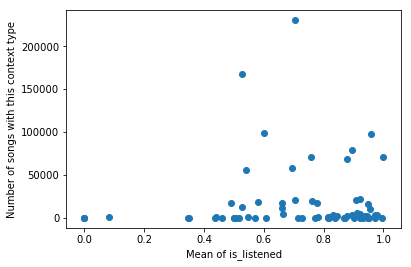

context_type
0     3198365
1     1617653
2     1052844
3      433456
4      230259
5      167428
6       98523
7       97645
8       79330
9       71572
10      71026
11      68775
12      58460
13      55830
14      21641
15      20826
16      20725
17      20075
18      18933
19      17973
20      17489
21      16918
22      16625
23      13168
24      11200
25      10206
26       6158
27       5017
28       4256
29       3739
       ...   
44        658
45        593
46        510
47        474
48        375
49        278
50        278
51        265
52        206
53        162
54        153
55        147
56        127
57        118
58        112
59        100
60         98
61         92
62         91
63         72
64         35
65         33
66         27
67          7
68          7
69          3
70          2
71          2
72          2
73          1
Name: media_id, dtype: int64


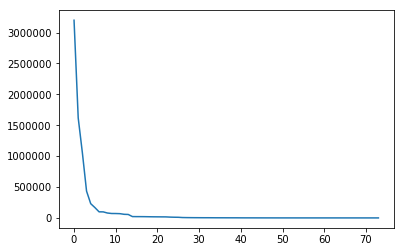

In [4]:
#Train set

print(sorted(train['context_type'].unique()))
avg_per_context = train.groupby(['context_type'])['is_listened'].mean()
count_per_context = train.groupby(['context_type'])['media_id'].count()
# print(avg_per_context)

plt.scatter(avg_per_context[4:],count_per_context[4:])
plt.xlabel('Mean of is_listened')
plt.ylabel('Number of songs with this context type')
plt.show()

# plt.hist2d(avg_per_context,count_per_context, bins=50, cmap = plt.cm.gist_ncar)#colormaps:  plt.cm.jet, plt.cm.nipy_spectral
# plt.xlabel('Mean of is_listened')
# plt.ylabel('Number of songs that the user listened to')
# plt.title('Density')
# plt.colorbar()
# plt.show()


print(count_per_context)

plt.plot(count_per_context)
plt.show()

In [20]:
print(train[(train['context_type'] == 1) & (train['listen_type'] == 1)]['is_listened'].mean())
print(train[(train['context_type'] == 4) & (train['listen_type'] == 1)]['is_listened'].mean())
print(train[(train['context_type'] == 5) & (train['listen_type'] == 1)]['is_listened'].mean())
print(train[(train['context_type'] == 6) & (train['listen_type'] == 1)]['is_listened'].mean())
print(train[(train['context_type'] == 7) & (train['listen_type'] == 1)]['is_listened'].mean())
print(train[(train['context_type'] == 13) & (train['listen_type'] == 1)]['is_listened'].mean())

0.5735944678809699
0.7053144502495017
0.5275879781159662
0.6014636176324311
0.9579087510881253
0.5397098334228909


In [5]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')


# print_full(train.groupby(['context_type'])['listen_type'].unique())
# print_full(train.groupby(['context_type','listen_type'])['listen_type'].count())
print_full(train.groupby(['context_type'])['listen_type'].value_counts())

context_type  listen_type
0             0              3198063
              1                  302
1             1              1617608
              0                   45
2             0              1052760
              1                   84
3             0               433434
              1                   22
4             1               230259
5             1               167428
6             1                98523
7             1                97645
8             0                79322
              1                    8
9             0                71534
              1                   38
10            0                71026
11            0                68772
              1                    3
12            0                58457
              1                    3
13            1                55830
14            0                21641
15            0                20825
              1                    1
16            0                20725
17          

Except from some context types (like 22,29,30,46), the extreme majority (>95%) of songs of one given context_type, have the same listen_type. So context_type can be seen as an information more detailed than listen_type !

In [98]:
#Percentages in test
print(count_per_context_test * 100 / count_per_context_test.sum())

print()

#Percentages in train
print(count_per_context * 100 / count_per_context.sum())

context_type
1     81.167788
5     16.628176
20     1.260167
23     0.943870
Name: media_id, dtype: float64

context_type
0     42.312941
1     21.400827
2     13.928656
3      5.734429
4      3.046224
5      2.214998
6      1.303415
7      1.291800
8      1.049500
9      0.946866
10     0.939642
11     0.909863
12     0.773400
13     0.738606
14     0.286301
15     0.275519
16     0.274182
17     0.265583
18     0.250475
19     0.237775
20     0.231372
21     0.223818
22     0.219941
23     0.174207
24     0.148171
25     0.135021
26     0.081468
27     0.066373
28     0.056305
29     0.049465
        ...    
44     0.008705
45     0.007845
46     0.006747
47     0.006271
48     0.004961
49     0.003678
50     0.003678
51     0.003506
52     0.002725
53     0.002143
54     0.002024
55     0.001945
56     0.001680
57     0.001561
58     0.001482
59     0.001323
60     0.001296
61     0.001217
62     0.001204
63     0.000953
64     0.000463
65     0.000437
66     0.000357
67     0.00009